In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from pykern import pkyaml
from sirepo.template import madx_parser
from rsbeams.rsdata.SDDS import readSDDS
from scipy import constants

# MADX

# Load Results 


In [3]:
madx_particle_file = 'madx/ptc_track.file.tfsone'


In [4]:
mp = madx_parser.parse_tfs_file(
        madx_particle_file
    )
    

In [5]:
madx_particles = {}
for k, v in mp.items():
    madx_particles[k] = np.array(v, float)

# elegant

In [6]:
elegant_particle_file = readSDDS('elegant/run_setup.output.sdds')
elegant_particle_file.read()
elegant_particles = elegant_particle_file.columns.squeeze()

elegant_sigma_file = readSDDS('elegant/run_setup.sigma.sdds')
elegant_sigma_file.read()
elegant_sigma = elegant_sigma_file.columns.squeeze()

elegant_twiss_file = readSDDS('elegant/twiss_output.filename.sdds')
elegant_twiss_file.read()
elegant_twiss = elegant_twiss_file.columns.squeeze()

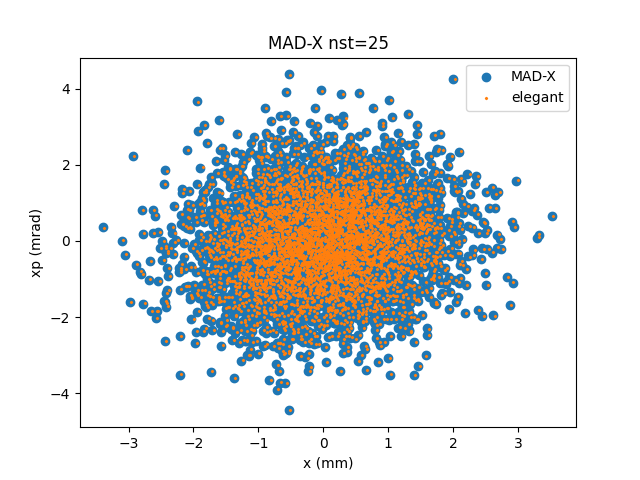

In [7]:
plt.figure()
plt.scatter(madx_particles['x'][5000:] * 1e3, madx_particles['px'][5000:] * 1e3, label='MAD-X')
plt.scatter(elegant_particles['x'] * 1e3, elegant_particles['xp'] * 1e3, marker='x', s=2, label='elegant')
plt.xlabel('x (mm)')
plt.ylabel('xp (mrad)')
plt.legend()
plt.title('MAD-X nst=25')
plt.show()

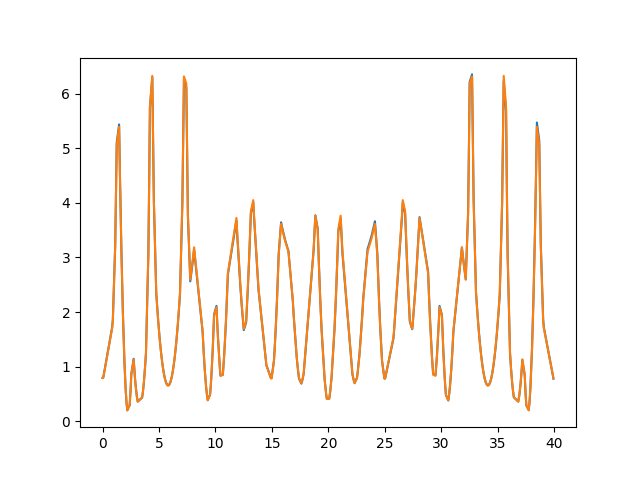

In [8]:
plt.figure()
plt.plot(elegant_sigma['s'], elegant_sigma['betaxBeam'])
plt.plot(elegant_twiss['s'], elegant_twiss['betax'])

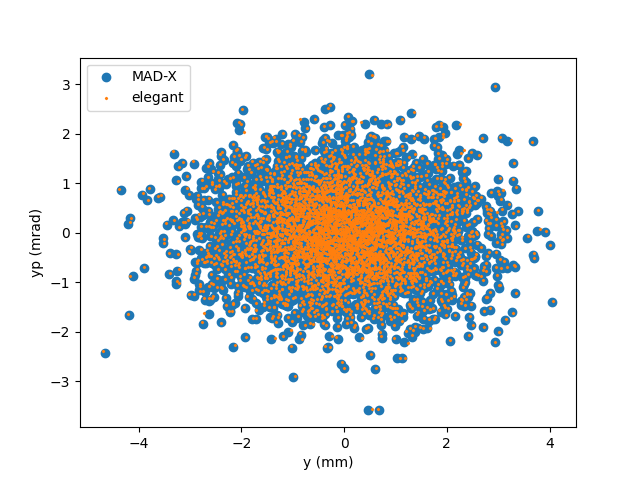

In [9]:
plt.figure()
plt.scatter(madx_particles['y'][5000:] * 1e3, madx_particles['py'][5000:] * 1e3, label='MAD-X')
plt.scatter(elegant_particles['y'] * 1e3, elegant_particles['yp'] * 1e3, marker='x', s=2, label='elegant')
plt.xlabel('y (mm)')
plt.ylabel('yp (mrad)')
plt.legend()
plt.show()

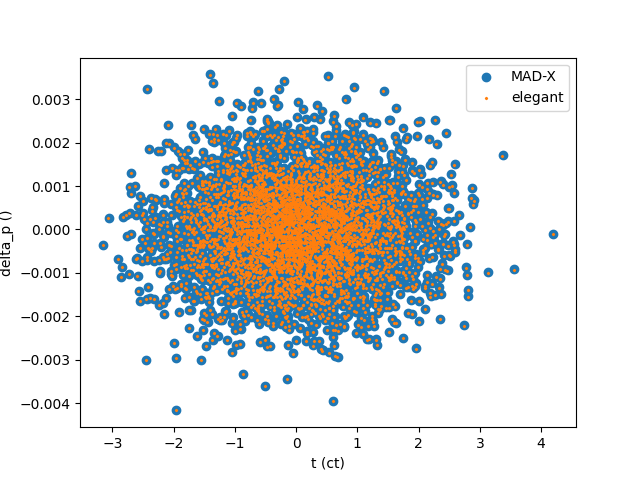

In [10]:
plt.figure()
plt.scatter(madx_particles['t'][5000:], madx_particles['pt'][5000:], label='MAD-X')
plt.scatter(-1*(elegant_particles['t'] - np.average(elegant_particles['t'])) * constants.c, 
            (elegant_particles['p'] - np.average(elegant_particles['p'])) / np.average(elegant_particles['p']), 
            marker='x', s=2, label='elegant')
plt.xlabel('t (ct)')
plt.ylabel('delta_p ()')
plt.legend()
plt.show()